In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from pandas.core.common import flatten
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
def model(data):
    
    
    
    #seperate x,y
    X = data.drop(['label',"image",'dif','probability'], axis=1)
    y = data['label'].values.reshape(-1,1)
    
    # split train_test 
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    #stratify = y is used when data is not enough or biased
    
    #find best alpha 
    alpha_list = 10**np.linspace(10,-2,100)*0.5
    
    #run model with all alpha 
    ridgecv = RidgeCV(alphas = alpha_list, scoring = 'neg_mean_squared_error', normalize = True)
    ridgecv.fit(train_X, train_y)
    
    #the best shrinkage
    ridgecv.alpha_
    
    #the best model
    ridge_refit = Ridge(alpha = ridgecv.alpha_, normalize = True)
    ridge_refit.fit(train_X, train_y)
    ridge_refit.predict(test_X)
    
    # run best model with a X data
    result = ridge_refit.predict(X)
    print("proabability", result)
    score = ridge_refit.score(X,y)
    print("R^2 score: ",score)
    
    
    #precition probability
    prediction = result
    prediction
    
    #actual label
    actual = y

    
    #plot ROC curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    #probability result
    data['probability'] = result
    
    #calculate absolute value
    data['dif'] = abs(data['probability']-0.5)
    
#     #create a bar chart
#     bar_x = range(data.shape[0])
#     bar_y = result.flatten()
#     plt.figure()
#     plt.bar(bar_x,bar_y)
#     plt.gca()
    
    #sort the data to 
    data.sort_values(by = 'dif',ascending=False)
    
    #find find the lowest difference 
    low_diff = data[data['dif'] < 0.3]

    data = pd.concat([data,low_diff],axis = 0)
    
    newX = data.drop(['label',"image","dif",'probability'], axis=1)
#     ridge_refit.predict(newX)


    
    


In [3]:
data = pd.read_csv("final_data_test_139.csv")


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['dif'] = 0
data['probability'] = 0

proabability [[0.12845217]
 [0.43151076]
 [0.95408758]
 [0.96914927]
 [0.815113  ]
 [0.01150359]
 [0.96933903]
 [0.88378373]
 [0.12254342]
 [0.08783371]
 [0.36556462]
 [0.83546124]
 [0.02036732]
 [0.01618596]
 [1.00557737]
 [0.11696234]
 [1.00151082]
 [0.81910823]
 [0.75284006]
 [0.00124257]]
R^2 score:  0.8907665983749528


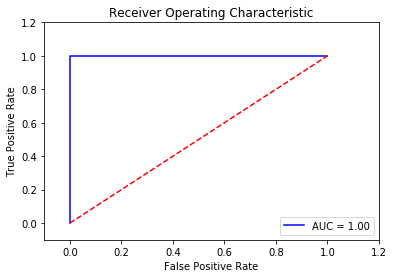

proabability [[0.12845217]
 [0.43151076]
 [0.95408758]
 [0.96914927]
 [0.815113  ]
 [0.01150359]
 [0.96933903]
 [0.88378373]
 [0.12254342]
 [0.08783371]
 [0.36556462]
 [0.83546124]
 [0.02036732]
 [0.01618596]
 [1.00557737]
 [0.11696234]
 [1.00151082]
 [0.81910823]
 [0.75284006]
 [0.00124257]]
R^2 score:  0.8907665983749528


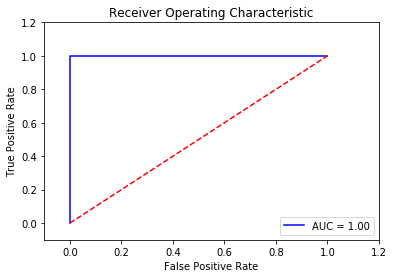

proabability [[0.12845217]
 [0.43151076]
 [0.95408758]
 [0.96914927]
 [0.815113  ]
 [0.01150359]
 [0.96933903]
 [0.88378373]
 [0.12254342]
 [0.08783371]
 [0.36556462]
 [0.83546124]
 [0.02036732]
 [0.01618596]
 [1.00557737]
 [0.11696234]
 [1.00151082]
 [0.81910823]
 [0.75284006]
 [0.00124257]]
R^2 score:  0.8907665983749528


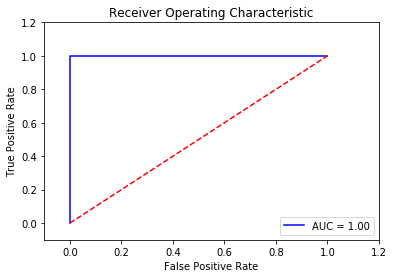

proabability [[0.12845217]
 [0.43151076]
 [0.95408758]
 [0.96914927]
 [0.815113  ]
 [0.01150359]
 [0.96933903]
 [0.88378373]
 [0.12254342]
 [0.08783371]
 [0.36556462]
 [0.83546124]
 [0.02036732]
 [0.01618596]
 [1.00557737]
 [0.11696234]
 [1.00151082]
 [0.81910823]
 [0.75284006]
 [0.00124257]]
R^2 score:  0.8907665983749528


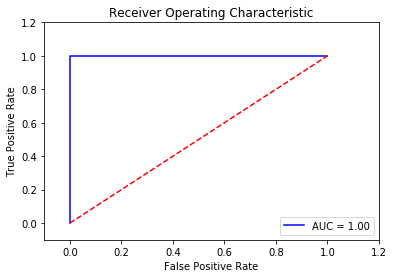

proabability [[0.12845217]
 [0.43151076]
 [0.95408758]
 [0.96914927]
 [0.815113  ]
 [0.01150359]
 [0.96933903]
 [0.88378373]
 [0.12254342]
 [0.08783371]
 [0.36556462]
 [0.83546124]
 [0.02036732]
 [0.01618596]
 [1.00557737]
 [0.11696234]
 [1.00151082]
 [0.81910823]
 [0.75284006]
 [0.00124257]]
R^2 score:  0.8907665983749528


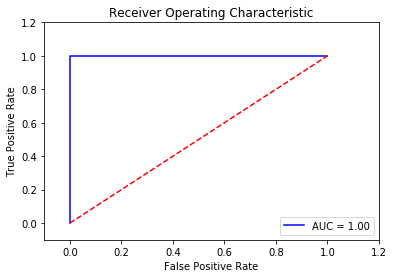

In [5]:
# model(data)
for i in range(5):
    model(data)